In [1]:
import pandas as pd

df = pd.read_csv("customer_data.csv")
df.head()

,CustomerID,Age,Annual Income,Spending Score
0,1,56,29,63
1,2,69,104,85
2,3,46,56,32
3,4,32,138,87
4,5,60,77,33


In [2]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv("customer_data.csv")

# Inspect data
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
df.head()



Shape: (150, 4)

Missing Values:
 CustomerID        0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Duplicate Rows: 0

Data Types:
 CustomerID        int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual Income  Spending Score
count  150.000000  150.000000     150.000000      150.000000
mean    75.500000   42.700000      88.740000       50.446667
std     43.445368   14.970104      40.234119       28.556675
min      1.000000   18.000000      16.000000        1.000000
25%     38.250000   31.000000      53.000000       24.250000
50%     75.500000   42.000000      95.500000       52.000000
75%    112.750000   56.000000     127.000000       69.000000
max    150.000000   69.000000     149.000000       99.000000


,CustomerID,Age,Annual Income,Spending Score
0,1,56,29,63
1,2,69,104,85
2,3,46,56,32
3,4,32,138,87
4,5,60,77,33


In [4]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Age', 'Annual Income', 'Spending Score']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


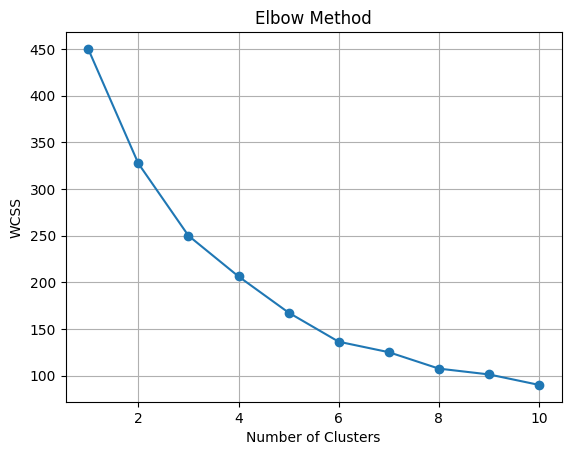

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [8]:
from sklearn.cluster import KMeans

# Apply KMeans with 5 clusters (you can change if needed)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters


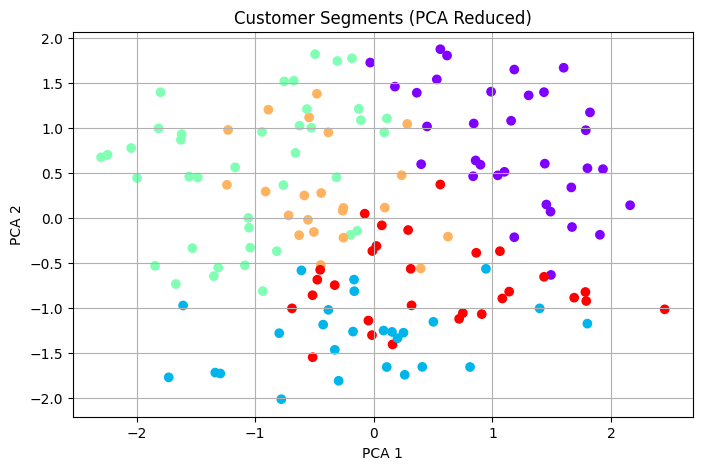

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 components using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='rainbow')
plt.title('Customer Segments (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


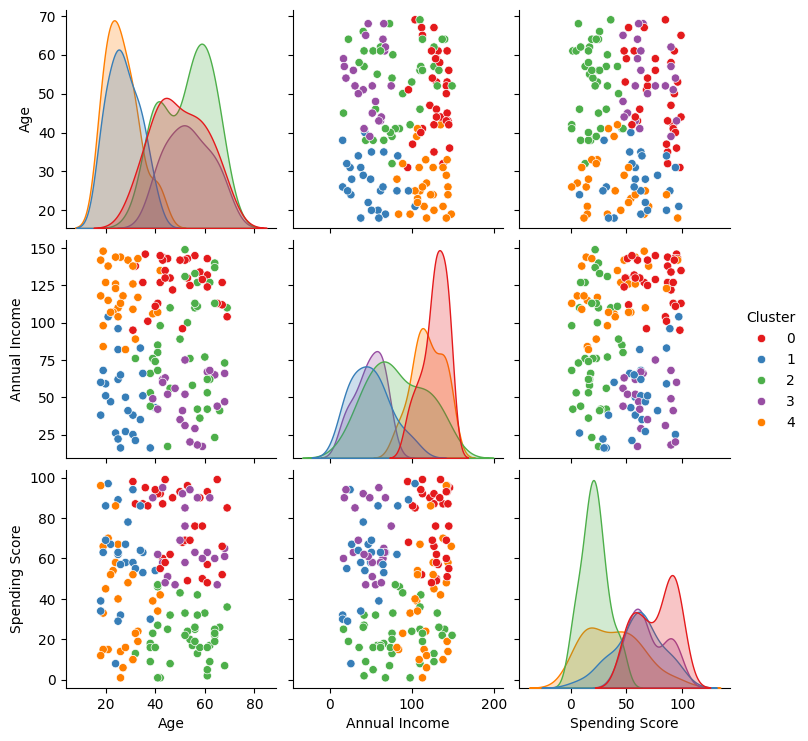

In [10]:
import seaborn as sns

sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='Set1')
plt.show()


In [11]:
# Save the new dataset with clusters
df.to_csv("clustered_customers.csv", index=False)
